# Elementary Asset Pricing Theory


```{index} single: Elementary Asset Pricing
```

```{contents} Contents
:depth: 2
```

## Overview

This lecture is about  some implications of  asset-pricing theories that are based on the equation
$E m R = 1,$ where $R$ is the gross return on an asset, $m$ is  a stochastic discount factor, and $E$ is a mathematical expectation with respect to a joint probability distribution of $R$ and $m$.

Instances of this equation occur in  many models. 

```{note}
Chapter 1 of {cite}`Ljungqvist2012` describes the role that this equation plays in a diverse set of
models in macroeconomics, monetary economics, and public finance.
```


We aim to convey insights about empirical implications of this equation brought out in the work of Lars Peter Hansen {cite}`HansenRichard1987` and Lars Peter Hansen and Ravi Jagannathan {cite}`Hansen_Jagannathan_1991`. 

By following their footsteps, from  that single equation  we'll derive 

* a mean-variance frontier 

* a single-factor model of  excess  returns  


To do this, we use two ideas:

  * the equation $E m R =1 $ that is  implied by an application of a *law of one price*
  
  * a Cauchy-Schwartz inequality

In particular, we'll apply a Cauchy-Schwartz inequality to a population linear least squares regression equation that is
implied by $E m R =1$.

We'll also describe how  practitioners have implemented the model using

* cross sections of returns on many assets
* time series of returns on various assets


For background and basic  concepts about linear least squares projections, see our lecture [orthogonal projections and their applications](https://python-advanced.quantecon.org/orth_proj.html).

As a sequel to the material here, please see our lecture [two modifications of mean-variance portfolio theory](https://python-advanced.quantecon.org/black_litterman.html).

## Key Equation

We  begin with a **key asset pricing equation**:


$$
E m R^i = 1  
$$ (eq:EMR1)

for $i=1, \ldots, I$ and where
 
$$
\begin{aligned}
m &=\text { stochastic discount factor } \\
R^{i} &= \text {random gross return  on asset }  i \\
E &\sim \text { mathematical expectation }
\end{aligned}
$$

The random gross return $R^i$ for every asset $i$ and the scalar stochastic discount factor $m$ 
live in a common probability space. 

{cite}`HansenRichard1987` and {cite}`Hansen_Jagannathan_1991` explain how **existence** of a scalar stochastic discount factor that verifies  equation
{eq}`eq:EMR1` is implied by a __law of one price__ that requires that all portfolios of assets 
that bring the  same payouts  have the same price.

They also explain how the __absence of an arbitrage__ opportunity implies that the stochastic discount
factor $m \geq 0$.

In order to say something about the **uniqueness** of a stochastic discount factor, we  would have to impose more theoretical structure than we do in this
lecture.   

For example, in **complete markets** models like those illustrated in this lecture [equilibrium capital structures with incomplete markets](https://python-advanced.quantecon.org/BCG_incomplete_mkts.html),
the stochastic discount factor is unique.

In **incomplete markets** models like those illustrated in this lecture [the Aiyagari model](https://python.quantecon.org/aiyagari.html), the stochastic discount factor is not unique.


## Implications of Key Equation


We combine  key equation {eq}`eq:EMR1` with a  remark of Lars Peter Hansen that   "asset pricing theory is all about covariances".

```{note}
Lars Hansen's remark is a concise summary of ideas in {cite}`HansenRichard1987` and
{cite}`Hansen_Jagannathan_1991`. Important foundations of these ideas were set down by
{cite}`Ross_76`, {cite}`Ross_78`, {cite}`Harrison_Kreps_JET_79`, {cite}`Kreps_81`, and
{cite}`Chamberlain_Rothschild`.
```

This remark of Lars Hansen refers to the fact that interesting restrictions can be deduced by recognizing that $E m R^i$ is a component of the covariance between $m $ and $R^i$ and then using that fact to rearrange  equation  {eq}`eq:EMR1`.


Let's do this step by step.

First note  that the definition of a
covariance 
$\operatorname{cov}\left(m, R^{i}\right)  =  E (m - E m)(R^i - E R^i) $
 implies that

$$ 
E m R^i = E m E R^{i}+\operatorname{cov}\left(m, R^{i}\right)
$$

Substituting this result into 
 equation {eq}`eq:EMR1` gives

$$
1 = E m E R^{i}+\operatorname{cov}\left(m, R^{i}\right) 
$$ (eq:EMR2) 
 
Next note that for a risk-free asset with non-random gross return $R^f$, equation
{eq}`eq:EMR1` becomes 

$$
1 = E R^f m = R^f E m.
$$

This is true because we can pull the constant $R^f$ outside the mathematical expectation. 

It follows that the  gross return on a risk-free asset is

$$ 
R^{f}  = 1 / E(m) 
$$

Using this formula for $R^f$ in equation {eq}`eq:EMR2` and rearranging, it follows that

$$
R^{f} = E R^{i}+\operatorname{cov}\left(m, R^{i} \right) R^{f}
$$

which can be rearranged to become

$$
E R^i = R^{f}-\operatorname{cov}\left(m, R^{i}\right) R^{f} . 
$$

It follows that we can express an **excess return** $E R^{i}-R^{f}$ on asset $i$ relative to the risk-free rate as

$$ 
E R^{i}-R^{f} = -\operatorname{cov}\left(m, R^{i}\right) R^{f} 
$$ (eq:EMR3)
 

Equation {eq}`eq:EMR3` can be rearranged to display important parts of asset pricing theory.


## Expected Return - Beta Representation

We can obtain the celebrated **expected-return-Beta -representation** for gross return $R^i$  by simply  rearranging excess return equation {eq}`eq:EMR3` to become

$$
E R^{i}=R^{f}+\left(\underbrace{\frac{\operatorname{cov}\left(R^{i}, m\right)}{\operatorname{var}(m)}}_{\quad\quad\beta_{i,m} = \text{regression coefficient}}\right)\left(\underbrace{-\frac{\operatorname{var}(m)}{E(m)}}_{\quad\lambda_{m} = \text{price of risk}}\right) 
$$
 
or

$$
E R^{i}=R^{f}+\beta_{i, m} \lambda_{m} 
$$ (eq:ERbetarep)

Here 

 * $\beta_{i,m}$ is a (population) least squares regression coefficient of gross return $R^i$ on stochastic discount factor $m$
 
 * $\lambda_m$ is minus the variance of $m$ divided by the mean of $m$, an object that is sometimes called a **price of risk**.


Because $\lambda_m < 0$, equation {eq}`eq:ERbetarep` asserts that 

* assets whose returns are **positively** correlated with the stochastic discount factor (SDF) $m$ have expected returns **lower** than the risk-free rate $R^f$
 * assets whose returns are **negatively** correlated with the SDF $m$ have expected returns **higher** than the risk-free rate $R^f$

These patterns will be discussed more below.

In particular, we'll see that returns that are **perfectly** negatively correlated with the SDF $m$ have a special
status:

* they are on a **mean-variance frontier**


Before we dive into that more, we'll pause to look at an example of an SDF.
 
To interpret  representation {eq}`eq:ERbetarep`, the following widely used example helps.
 


 
**Example** 

Let $c_t$ be the logarithm of the consumption of a _representative consumer_ or just a single consumer for whom we have consumption data.

A popular model of $m$ is


$$
m_{t+1} = \beta \frac{U'(C_{t+1})}{U'(C_t)}
$$

where $C_t$ is consumption at time $t$, $\beta = \exp(-\rho)$ is a discount **factor** with $\rho$ being
the discount **rate**, and $U(\cdot)$ is a concave, twice-diffential utility function.

For a constant relative risk aversion (CRRA) utility function $U(C) = \frac{C^{1-\gamma}}{1-\gamma}$ utility
function $U'(C) = C^{-\gamma}$.

In this case, letting $c_t = \log(C_t)$, we can write $m_{t+1}$ as

$$ 
m_{t+1} = \exp(-\rho) \exp(- \gamma(c_{t+1} - c_t)) 
$$

where $ \rho > 0$, $\gamma > 0$.

A popular model  for the growth of  log of consumption  is 

$$ 
c_{t+1} - c_t = \mu + \sigma_c \epsilon_{t+1} 
$$

where $\epsilon_{t+1} \sim {\mathcal N}(0,1)$.

Here $\{c_t\}$ is a random walk with drift $\mu$, a good approximation to US per capital consumption growth.

Again here 

  * $\gamma >0$ is a coefficient of relative risk aversion
  
  * $\rho >0 $ is a fixed intertemporal discount rate 
  
So we have 

$$ 
m_{t+1} = \exp(-\rho) \exp( - \gamma \mu - \gamma \sigma_c \epsilon_{t+1}) 
$$

In this case 

$$ 
E m_{t+1} = \exp(-\rho) \exp \left( - \gamma \mu + \frac{\sigma_c^2 \gamma^2}{2} \right) 
$$

and 

$$ 
\operatorname{var}(m_{t+1}) = E(m) [ \exp(\sigma_c^2 \gamma^2) - 1) ] 
$$

When $\gamma >0$, it is true that  

 * when consumption growth is **high**, $m$ is **low**
 
 * when consumption growth is **low**, $m$ is **high**
 
According to representation {eq}`eq:ERbetarep`, an asset with a gross return  $R^i$ that is expected to be **high** when consumption growth is **low**  has $\beta_{i,m}$ positive and a **low** expected return.  

   * because it has a high gross return when consumption growth is low, it is a good hedge against consumption risk. That justifies its low average return.

An asset with an $R^i$ that is **low** when consumption growth is **low** has $\beta_{i,m}$ negative and a **high** expected return.

  * because it has a low gross return when consumption growth is low, it is a poor hedge against consumption risk. That  justifies its high average return.


 

## Mean-Variance Frontier 

Now we'll derive the celebrated **mean-variance frontier**.

We do this using a  method deployed by Lars Peter Hansen and Scott
Richard {cite}`HansenRichard1987`. 

```{note}
Methods of Hansen and Richard are described and used extensively by {cite}`Cochrane_2005`.
```

Their  idea was rearrange the key equation  {eq}`eq:EMR1`, namely,  $E m R^i = 1$, and then  to  apply a Cauchy-Schwarz inequality.

A convenient way to remember the Cauchy-Schwartz inequality in our context is that it says that an  $R^2$ in any regression has to be  less than or equal to $1$.

(Please note that here $R^2$ denotes the coefficient of determination in a regression, not a return on an asset!)

Let's apply that idea to deduce


$$ 
1= E\left(m R^{i}\right)=E(m) E\left(R^{i}\right)+\rho_{m, R^{i}}\frac{\sigma(m)}{E(m)} \sigma\left(R^{i}\right) 
$$ (eq:EMR5) 

where the correlation coefficient $\rho_{m, R^i}$ is   defined as

$$ 
\rho_{m, R^i} \equiv \frac{\operatorname{cov}\left(m, R^{i}\right)}{\sigma(m) \sigma\left(R^{i}\right)} 
$$


and where $\sigma(\cdot)$ denotes the standard deviation of the variable in parentheses

Equation {eq}`eq:EMR5`  implies

$$
E R^{i}=R^{f}-\rho_{m, R^i} \frac{\sigma(m)}{E(m)} \sigma\left(R^{i}\right)
$$

Because $\rho_{m, R^i} \in [-1,1]$, it follows that  $|\rho_{m, R^i}| \leq 1$ and that

$$
\left|E R^i-R^{f}\right| \leqslant \frac{\sigma(m)}{E(m)} \sigma\left(R^{i}\right) 
$$ (eq:ERM6)

Inequality {eq}`eq:ERM6` delineates a **mean-variance frontier**

(Actually, it looks more like a **mean-standard-deviation frontier**)


Evidently, points on the frontier correspond to gross returns that are perfectly correlated
(either positively or negatively) with the stochastic discount factor $m$.

We summarize this observation  as

$$
\rho_{m, R^{i}}=\left\{\begin{array}{ll}
+1 & \implies R^i \text { is on  lower frontier } \\
-1 & \implies R^i \text { is on  an upper frontier }
\end{array}\right.
$$

Now let's use matplotlib to draw a mean variance frontier.

In drawing a frontier, we'll set $\sigma(m) = .25$ and $E m = .99$, values roughly consistent with what many studies calibrate from quarterly US data.

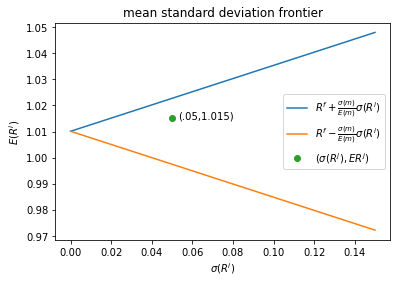

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Define the function to plot
def y(x, alpha, beta):
    return alpha + beta*x
def z(x, alpha, beta):
    return alpha - beta*x

sigmam = .25
Em = .99

# Set the values of alpha and beta
alpha = 1/Em
beta = sigmam/Em

# Create a range of values for x
x = np.linspace(0, .15, 100)

# Calculate the values of y and z
y_values = y(x, alpha, beta)
z_values = z(x, alpha, beta)

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot y
ax.plot(x, y_values, label=r'$R^f + \frac{\sigma(m)}{E(m)} \sigma(R^i)$')
ax.plot(x, z_values, label=r'$R^f - \frac{\sigma(m)}{E(m)} \sigma(R^i)$')

plt.title('mean standard deviation frontier')
plt.xlabel(r"$\sigma(R^i)$")
plt.ylabel(r"$E (R^i) $")
plt.text(.053, 1.015, "(.05,1.015)")  
ax.plot(.05, 1.015, 'o', label="$(\sigma(R^j), E R^j)$")
# Add a legend and show the plot
ax.legend()
plt.show()

The figure shows two straight lines, the blue upper one being the locus of $( \sigma(R^i), E(R^i)$ pairs that are on 
the **mean-variance frontier** or **mean-standard-deviation frontier**.  

The green dot refers to a return  $R^j$ that is **not** on the frontier and that has moments
$(\sigma(R^j), E R^j) =  (.05, 1.015)$.  

It is described by the statistical model

$$ 
 R^j = R^i +  \epsilon^j
$$

where $R^i$ is a return that is on the frontier and  $\epsilon^j$ is a random variable that has mean zero and that is orthogonal to $R^i$.

Then $ E R^j = E R^i$ and, as a consequence of $R^j$ not being on the frontier, 

$$
\sigma^2(R^j) = \sigma^2(R^i) + \sigma^2(\epsilon^j)
$$

The length of a horizontal line from the point $\sigma(R^j), E (R^j) = .05, 1.015$ to
the frontier   equals

$$
\sqrt{ \sigma^2(R^i) + \sigma^2( \epsilon^j)} - \sigma(R^i)
$$

This is a measure of the part of the risk in $R^j$ that is not priced because it is  uncorrelated with the stochastic discount factor and so can be diversified away (i.e., averaged out to zero by holding a diversified portfolio).


## Sharpe Ratios and the Price of Risk

An asset's **Sharpe ratio** is defined as

$$
 \frac{E(R^i) - R^f}{\sigma(R^i)} 
$$

The above figure reminds us that all assets $R^i$ whose returns are on the mean-standard deviation frontier
satisfy

$$
\frac{E(R^i) - R^f}{\sigma(R^i)}  = \frac{\sigma(m)}{E m} 
$$

The ratio $\frac{\sigma(m)}{E m} $ is often called the **market price of risk**.

Evidently it equals the maximum Sharpe ratio for any asset or portfolio of assets.


## Mathematical Structure of Frontier

The mathematical  structure of the mean-variance frontier described by inequality {eq}`eq:ERM6` implies 
that


- all returns on the frontier are perfectly correlated.

  Thus,
   
   * Let $R^m, R^{mv}$ be two returns on the frontier. 
   
   * Then for some scalar $a$, a return $R^{m v}$ on the mean-variance frontier satisfies the affine equation
       $R^{m v}=R^{f}+a\left(R^{m}-R^{f}\right)$ .  This is an **exact** equation with no **residual**.
 
 
- each return $R^{mv}$ that is on the mean-variance frontier is perfectly (negatively) correlated with $m$ 
  
   *  $\left(\rho_{m, R^{mv}}=-1\right) \Rightarrow \begin{cases} m=a+b R^{m v} \\ R^{m v}=e+d  m  \end{cases}$ for some scalars $a, b, e, d$, 
   
   Therefore, **any return on the mean-variance frontier is a legitimate stochastic discount factor**


- for any mean-variance-efficient return $R^{m v}$ that is on the frontier but that is  **not** $R^{f}$, there exists  a **single-beta representation** for any return $R^i$ that takes the form:

$$ 
E R^{i}=R^{f}+\beta_{i, R^{m v}}\left[E\left(R^{m v}\right)-R^{f}\right] 
$$ (eq:EMR7) 

- the regression coefficient $\beta_{i, R^{m v}}$ is often called asset $i$'s **beta**
   
- The special case of a single-beta representation {eq}`eq:EMR7` with $ R^{i}=R^{m v}$   is 
  
  $E R^{m v}=R^{f}+1 \cdot\left[E\left(R^{m v}\right)-R^{f}\right] $

## Multi-factor Models

The single-beta representation  {eq}`eq:EMR7` is a special case of the multi-factor model 


$$
E R^{i}   =\gamma+\beta_{i, a} \lambda_{a}+\beta_{i, b} \lambda_{b}+\cdots
$$


where $\lambda_j$ is the price of being exposed to risk factor $f_t^j$  and $\beta_{i,j}$ is asset $i$'s exposure to that
risk factor.  

To uncover the $\beta_{i,j}$'s, one  takes data on time series of the risk factors $f_t^j$ that are being priced
and specifies the following least squares regression


$$
R_{t}^{i}=a_{i}+\beta_{i, a} f_{t}^{a}+\beta_{i, b} f_{t}^{b}+\ldots+\epsilon_{t}^{i}, \quad t=1,2, \ldots, T\\
\epsilon_{t}^{i} \perp f_{t}^{j}, i=1,2, \ldots, I; j = a, b, \ldots 
$$ (eq:timeseriesrep)

Special cases are:

   * a popular **single-factor** model specifies the single factor  $f_t$ to be the return on the market portfolio 
   
   * another popular **single-factor** model called the **consumption-based model** specifies the factor to be  $ m_{t+1} = \beta \frac{u^{\prime}\left(c_{t+1}\right)}{u^{\prime}\left(c_{t}\right)}$, where $c_t$ is a representative consumer's time $t$ consumption.
   

As a reminder, model objects are interpreted as follows:   
 
   * $\beta_{i,a}$ is the  exposure of return $R^i$ to risk factor $f_a$ 
   
   * $\lambda_{a}$ is the  price of exposure to risk factor $f_a$ 
   
## Empirical Implementations

We briefly describe empirical implementations of multi-factor generalizations of the single-factor model described above.  

Two representations of a multi-factor model play importnt roles in empirical applications.

One is the time series regression {eq}`eq:timeseriesrep`

The other representation entails  a **cross-section regression**  of **average returns** $E R^i$ for  assets
$i =1, 2, \ldots, I$ on **prices of risk** $\lambda_j$ for $j =a, b, c, \ldots$ 

Here is the cross-section regression specification for a multi-factor model:


$$
E R^{i}   =\gamma+\beta_{i, a} \lambda_{a}+\beta_{i, b} \lambda_{b}+\cdots
 $$

**Testing strategies:**

Time-series and cross-section regressions play roles in both  **estimating** and **testing** beta representation
models.

The basic idea is to implement the following two steps.

**Step 1:**

- Estimate $a_{i}, \beta_{i, a}, \beta_{i, b}, \cdots$ by running a **time series regression:** $R_{t}^{i}$ on a constant and $f_{t}^{a}, f_{t}^{b}, \ldots$


**Step 2:**

- take the $\beta_{i, j}$'s estimated in step one as regressors together with data on average returns
$E R^i$ over some period and then  estimate the  **cross-section regression**


$$
\underbrace{E\left(R^{i}\right)}_{\text{average return over time series}}=\gamma+\underbrace{\beta_{i, a}}_{\text{regressor}\quad} \underbrace{\lambda_{a}}_{\text{regression}\text{coefficient}}+\underbrace{\beta_{i, b}}_{\text{regressor}\quad} \underbrace{\lambda_{b}}_{\text{regression}\text{coefficient}}+\cdots+\underbrace{\alpha_{i}}_{\text{pricing errors}}, i=1, \ldots, I; \quad \underbrace{\alpha_i \perp \beta_{i,j},j = a, b, \ldots}_{\text{least squares orthogonality condition}}
$$

- Here $\perp$ means **orthogonal to**

- estimate $\gamma, \lambda_{a}, \lambda_{b}, \ldots$ by an appropriate regression technique,  recognizing that the regressors have been generated by a step 1 regression.

Note that presumably  the risk-free return $E R^{f}=\gamma$.

For excess returns $R^{ei} = R^i - R^f$ we have

$$
E R^{e i}=\beta_{i, a} \lambda_{a}+\beta_{i, b} \lambda_{b}+\cdots+\alpha_{i}, i=1, \ldots, I
$$


In the  following exercises, we illustrate aspects of these empirical strategies on artificial data. 

Our basic tools are random number generator that we shall use to create artificial samples that conform to the theory and
least squares regressions that let us watch aspects of the theory at work.

These exercises will further convince us that asset pricing theory is mostly about covariances and least squares regressions.

## Exercises 

Let's start with some imports.

In [2]:
import numpy as np
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import GMM
import matplotlib.pyplot as plt
%matplotlib inline

Lots of our calculations will involve computing population and sample OLS regressions.

So we define a function for simple univariate OLS regression that calls the `OLS` routine from `statsmodels`.

In [3]:
def simple_ols(X, Y, constant=False):

    if constant:
        X = sm.add_constant(X)

    model = sm.OLS(Y, X)
    res = model.fit()

    β_hat = res.params[-1]
    σ_hat = np.sqrt(res.resid @ res.resid / res.df_resid)

    return β_hat, σ_hat

```{exercise-start}
:label: apl_ex1
```

Look at the equation, 

$$
R^i_t - R^f = \beta_{i, R^m} (R^m_t - R^f) + \sigma_i \varepsilon_{i, t}.
$$

Verify that this equation is a regression equation.

```{exercise-end}
```

```{solution-start} apl_ex1
:class: dropdown
```

To verify that it is a **regression equation** we must show that the residual is orthogonal to the regressor.

Our assumptions about mutual orthogonality imply that

$$
E\left[\epsilon_{i,t}\right]=0,\quad E\left[\epsilon_{i,t}u_{t}\right]=0
$$

It follows that

$$
\begin{aligned}
E\left[\sigma_{i}\epsilon_{i,t}\left(R_{t}^{m}-R^{f}\right)\right]&=E\left[\sigma_{i}\epsilon_{i,t}\left(\xi+\lambda u_{t}\right)\right] \\
	&=\sigma_{i}\xi E\left[\epsilon_{i,t}\right]+\sigma_{i}\lambda E\left[\epsilon_{i,t}u_{t}\right] \\
	&=0
\end{aligned}
$$

```{solution-end}
```


```{exercise-start}
:label: apl_ex2
```

Give a formula for the regression coefficient $\beta_{i, R^m}$.

```{exercise-end}
```

```{solution-start} apl_ex2
:class: dropdown
```

The regression coefficient $\beta_{i, R^m}$ is

$$
\beta_{i,R^{m}}=\frac{Cov\left(R_{t}^{i}-R^{f},R_{t}^{m}-R^{f}\right)}{Var\left(R_{t}^{m}-R^{f}\right)}
$$

```{solution-end}
```

```{exercise-start}
:label: apl_ex3
```

As in many sciences, it is useful to distinguish a  **direct problem** from  an **inverse problem**.

* A direct problem involves simulating a particular model with known parameter values.
* An inverse problem involves using data to **estimate** or **choose** a particular  parameter vector  from a manifold of models indexed by a set of parameter vectors.

Please assume the parameter values provided below and then simulate 2000 observations from the theory specified
above for 5 assets, $i = 1, \ldots, 5$.

\begin{align*}
E\left[R^f\right] &= 0.02 \\
\sigma_f &= 0.00 \\
\xi &= 0.06 \\
\lambda &= 0.04 \\
\beta_{1, R^m} &= 0.2 \\
\sigma_1 &= 0.04 \\
\beta_{2, R^m} &= .4 \\
\sigma_2 &= 0.04 \\
\beta_{3, R^m} &= .6 \\
\sigma_3 &= 0.04 \\
\beta_{4, R^m} &= .8 \\
\sigma_4 &= 0.04 \\
\beta_{5, R^m} &= 1.0 \\
\sigma_5 &= 0.04
\end{align*}

**More Exercises**

Now come some even more fun parts!

Our theory implies that there exist values of  two scalars, $a$ and $b$, such that  a legitimate stochastic discount factor is:

$$
m_t = a + b R^m_t
$$

The parameters $a, b$ must satisfy the following equations:

\begin{align*}
E[(a + b R_t^m) R^m_t)] &= 1 \\
E[(a + b R_t^m) R^f_t)] &= 1
\end{align*}

```{exercise-end}
```

```{solution-start} apl_ex3
:class: dropdown
```

**Direct Problem:**

In [4]:
# Code for the direct problem

# assign the parameter values
ERf = 0.02
σf = 0.00 # Zejin: Hi tom, here is where you manipulate σf
ξ = 0.06
λ = 0.08
βi = np.array([0.2, .4, .6, .8, 1.0])
σi = np.array([0.04, 0.04, 0.04, 0.04, 0.04])

In [5]:
# in this cell we set the number of assets and number of observations
# we first set T to a large number to verify our computation results
T = 2000
N = 5

In [6]:
# simulate i.i.d. random shocks
e = np.random.normal(size=T)
u = np.random.normal(size=T)
ϵ = np.random.normal(size=(N, T))

In [7]:
# simulate the return on a risk-free asset
Rf = ERf + σf * e

# simulate the return on the market portfolio
excess_Rm = ξ + λ * u
Rm = Rf + excess_Rm

# simulate the return on asset i
Ri = np.empty((N, T))
for i in range(N):
    Ri[i, :] = Rf + βi[i] * excess_Rm + σi[i] * ϵ[i, :]

Now that we have a panel of data, we'd like to solve the inverse problem by assuming the theory specified above and estimating the coefficients given above.

In [8]:
# Code for the inverse problem

**Inverse Problem:**

We will solve the inverse problem by simple OLS regressions.

1. estimate $E\left[R^f\right]$ and $\sigma_f$

In [9]:
ERf_hat, σf_hat = simple_ols(np.ones(T), Rf)

In [10]:
ERf_hat, σf_hat

(0.02000000000000003, 3.123283175179055e-17)

Let's  compare these with the _true_ population parameter values.

In [11]:
ERf, σf

(0.02, 0.0)

2. $\xi$ and $\lambda$

In [12]:
ξ_hat, λ_hat = simple_ols(np.ones(T), Rm - Rf)

In [13]:
ξ_hat, λ_hat

(0.06302287024648721, 0.08178445686921211)

In [14]:
ξ, λ

(0.06, 0.08)

3. $\beta_{i, R^m}$ and $\sigma_i$

In [15]:
βi_hat = np.empty(N)
σi_hat = np.empty(N)

for i in range(N):
    βi_hat[i], σi_hat[i] = simple_ols(Rm - Rf, Ri[i, :] - Rf)

In [16]:
βi_hat, σi_hat

(array([0.19226266, 0.39805875, 0.59939641, 0.7994372 , 1.00406981]),
 array([0.03913062, 0.04060062, 0.0394525 , 0.04049393, 0.04026443]))

In [17]:
βi, σi

(array([0.2, 0.4, 0.6, 0.8, 1. ]), array([0.04, 0.04, 0.04, 0.04, 0.04]))

Q: How close did your estimates come to the parameters we specified?

```{solution-end}
```

```{exercise-start}
:label: apl_ex4
```

Using the equations above, find a system of two **linear** equations that you can solve for $a$ and $b$ as functions of the parameters $(\lambda, \xi, E[R_f])$.

Write a function that can solve these equations.

Please check the **condition number** of a key matrix that must be inverted to determine a, b

```{exercise-end}
```

```{solution-start} apl_ex4
:class: dropdown
```

The system of two linear equations is shown below:


$$
\begin{aligned}
a ((E(R^f) + \xi) + b ((E(R^f) + \xi)^2 + \lambda^2 + \sigma_f^2) & =1 \cr
a E(R^f) + b (E(R^f)^2 + \xi E(R^f) + \sigma_f ^ 2) & = 1 
\end{aligned}
$$

In [18]:
# Code here
def solve_ab(ERf, σf, λ, ξ):

    M = np.empty((2, 2))
    M[0, 0] = ERf + ξ
    M[0, 1] = (ERf + ξ) ** 2 + λ ** 2 + σf ** 2
    M[1, 0] = ERf
    M[1, 1] = ERf ** 2 + ξ * ERf + σf ** 2

    a, b = np.linalg.solve(M, np.ones(2))
    condM = np.linalg.cond(M)

    return a, b, condM

Let's try to solve $a$ and $b$ using the actual model parameters.

In [19]:
a, b, condM = solve_ab(ERf, σf, λ, ξ)

In [20]:
a, b, condM

(87.49999999999999, -468.7499999999999, 54.406619883717504)

```{solution-end}
```

```{exercise-start}
:label: apl_ex5
```

Using the estimates of the parameters that you generated above, compute the implied stochastic discount factor.

```{exercise-end}
```

```{solution-start} apl_ex5
:class: dropdown
```

Now let's pass $\hat{E}(R^f), \hat{\sigma}^f, \hat{\lambda}, \hat{\xi}$ to the function `solve_ab`.

In [21]:
a_hat, b_hat, M_hat = solve_ab(ERf_hat, σf_hat, λ_hat, ξ_hat)

In [22]:
a_hat, b_hat, M_hat

(89.11329275011468, -471.11467760619456, 55.89741512191402)

```{solution-end}
```